In [26]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/juarezefren/datasets/main/Iris.csv')
df.shape

(150, 6)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [28]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [30]:
df.drop(['Id'],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
X = df.iloc[:,:-1]
X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
y = df.iloc[:,-1]
y.head(5)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [33]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X,y, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [34]:
from sklearn.tree import DecisionTreeClassifier

#from sklearn.svm import SVC
#modelo2 = SVC(kernel='linear', C=1)

#from sklearn.neighbors import KNeighborsClassifier
#modelo3 = KNeighborsClassifier(n_neighbors=3)



modelo = DecisionTreeClassifier(criterion="entropy", random_state=0)




arbol_c =modelo.fit(x_train,y_train)

In [35]:
y_pred= modelo.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9333333333333333

In [37]:
from sklearn.metrics import confusion_matrix
C=confusion_matrix(y_pred, y_test)
print(C)

[[11  0  0]
 [ 0  7  1]
 [ 0  1 10]]


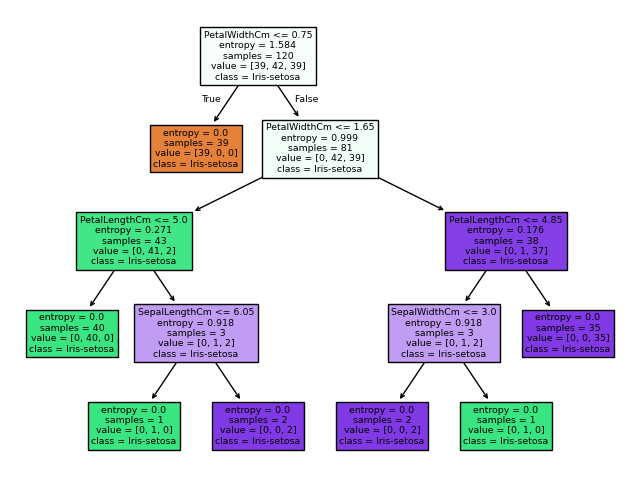

In [38]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,6))
tree.plot_tree(arbol_c, feature_names=list(X.columns.values),
              class_names = list(y.values), filled=True)
plt.show()

Característica: SepalLengthCm, Importancia: 0.01449268279443989
Característica: SepalWidthCm, Importancia: 0.01449268279443989
Característica: PetalLengthCm, Importancia: 0.06750261453710792
Característica: PetalWidthCm, Importancia: 0.9035120198740123


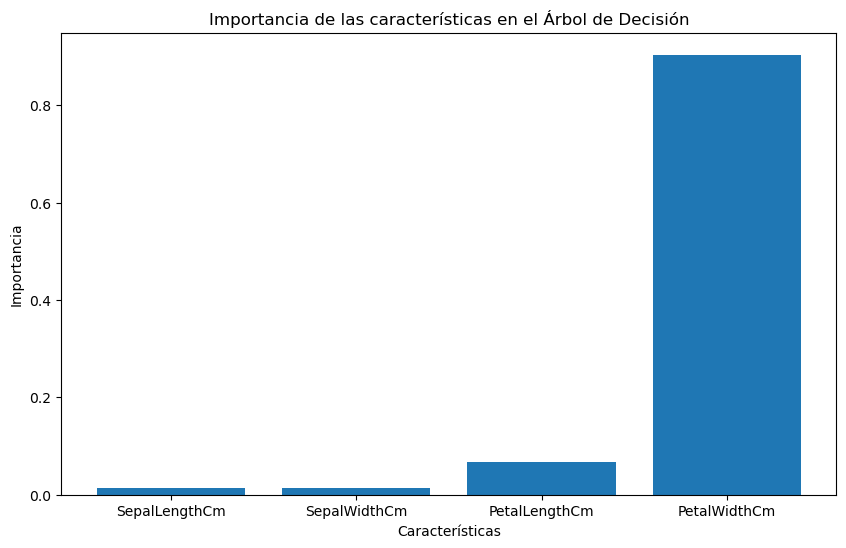

In [39]:
# Obtén las importancias de las características
importancias = arbol_c.feature_importances_

# Imprime las importancias de las características
for feature, importance in zip(X.columns, importancias):
    print(f"Característica: {feature}, Importancia: {importance}")

# Opcional: Grafica las importancias de las características
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(X.columns, importancias)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características en el Árbol de Decisión')
plt.show()

In [40]:
# Aquí vamos a implementar k-fold cross validation para k=5, obtendremos 5 accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, X, y,
                         scoring="accuracy",
                         cv=5, n_jobs=-1)  #cv es k
print(scores)
print(np.mean(scores))

[0.96666667 0.96666667 0.9        0.93333333 1.        ]
0.9533333333333334
